In [56]:
# import libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
from sklearn.linear_model import LinearRegression # linear regression model
from sklearn.metrics import mean_squared_error # mean squared error
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler # one hot encoder, min max scaler
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization


In [57]:
# Read the csv file using pandas and store it in a dataframe
df = pd.read_csv('C:\myprojects\civil\data_concrete_temp.csv') 

# Remove any rows with missing values from the dataframe
df= df.dropna()

# Convert the 'time' column to string type
df["time"] = df["time"].astype(str)

# Replace specific string values in the 'time' column with corresponding numeric values
df["time"] = df["time"].replace({'0h': 0, '4h': 4, '8h': 8, '12h': 12})

# Display the information of the dataframe including the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 127
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   grade     80 non-null     object 
 1   temp      80 non-null     object 
 2   time      80 non-null     int64  
 3   strength  80 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ KB


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\karthik rathod\AppData\Local\Temp\ipykernel_5124\1544951837.py:2: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv('C:\myprojects\civil\data_concrete_temp.csv')


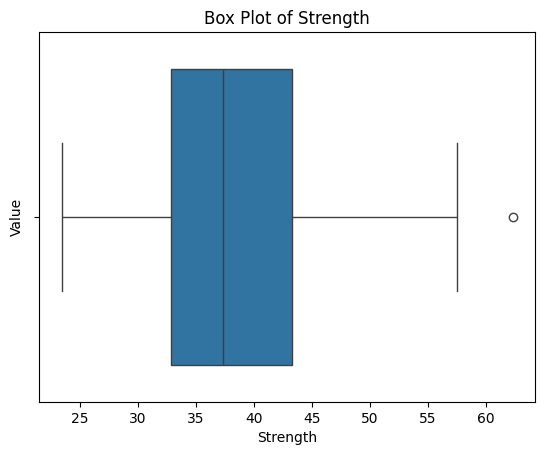

In [58]:
# Create a boxplot of the 'strength' column in the dataframe
sns.boxplot(data=df, x='strength')

# Set the x-axis label to 'Strength'
plt.xlabel('Strength')

# Set the y-axis label to 'Value'
plt.ylabel('Value')

# Set the title of the plot to 'Box Plot of Strength'
plt.title('Box Plot of Strength')

# Display the plot
plt.show()


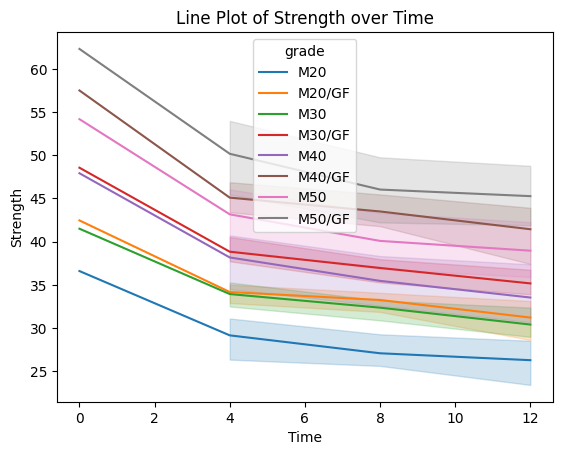

In [59]:
# Use the dataframe 'df' defined in the previous cell to create a line plot
# 'time' is set as the x-axis, 'strength' as the y-axis, and 'grade' as the hue (color)
sns.lineplot(data=df, x='time', y='strength', hue='grade')

# Set the label for the x-axis
plt.xlabel('Time')
# Set the label for the y-axis
plt.ylabel('Strength')
# Set the title for the plot
plt.title('Line Plot of Strength over Time')
# Display the plot
plt.show()


In [60]:
# Copy the original dataframe to avoid modifying the original data
df_model = df.copy(deep=True)

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder to the 'grade' and 'temp' columns of the dataframe
encode = encoder.fit(df_model[['grade', 'temp']])

# Transform the 'grade' and 'temp' columns into one-hot encoded arrays
encoded_features = encode.transform(df_model[['grade', 'temp']]).toarray()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the 'time' column of the dataframe and transform it
gf_scaled = scaler.fit_transform(df_model[['time']])

# Concatenate the one-hot encoded features and the scaled 'time' column to form the feature matrix X
X = np.concatenate([encoded_features, gf_scaled], axis=1)

# Define the target variable y as the 'strength' column of the dataframe
y_true = df_model['strength'].values


In [61]:
# Instantiate the LinearRegression model
model_temp = LinearRegression()

# Fit the model with the data (X, y_true)
model_temp.fit(X, y_true)


LinearRegression()

In [62]:
# Predict the compressive strength using the model
y_pred_strength =  model_temp.predict(X)

# Calculate the mean squared error between the predicted and actual compressive strength
mse_temp = mean_squared_error(y_pred_strength, y_true)

# Print the mean squared error
print(f'Mean Squared Error (Compressive Strength): {mse_temp:.2f}')


Mean Squared Error (Compressive Strength): 1.35


In [65]:
def predict_strength(grade, temp, time):
    """
    Predicts the strength of a material based on the given grade, temperature, and time.

    Parameters:
    - grade (str): The grade of the material.
    - temp (str): The temperature of the material.
    - time (float): The time duration.

    Returns:
    - None

    Prints the predicted strength of the material in N/mm2.
    """
    # Encode the grade and time using the previously defined encoder
    encoded_grade_temp = encode.transform([[grade, temp]]).toarray()

    # Normalize the percentage mix
    normalized_time = scaler.transform([[time]])

    # Prepare the input features
    input_features = np.concatenate([encoded_grade_temp, normalized_time], axis=1)

    # Predict the strengths using the trained models
    predicted_strength = (model_temp.predict(input_features)) 

    # Return the predicted strengths
    return print(f'Predicted Strength: {predicted_strength[0]:.2f} N/mm2')


In [66]:
predict_strength('M30/GF', "200C", 36)

Predicted Strength: 25.62 N/mm2


c:\study_setup\Anaconda\envs\scrape_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\study_setup\Anaconda\envs\scrape_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
